In [1]:
import random 
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy import optimize

#setting nice printing and seed
sm.init_printing(use_unicode=True)
random.seed(12848174)

In [2]:
rho = sm.symbols('rho')
beta = sm.symbols('beta')
gamma = sm.symbols('gamma')
w = sm.symbols('w')
b = sm.symbols('b')
delta = sm.symbols('Delta')
h1 = sm.symbols('h_1')
h2 = sm.symbols('h_2')
c1 = sm.symbols('c1')
c2 = sm.symbols('c2')
l1 = sm.symbols('l1')
l2 = sm.symbols('l2')
exp = sm.symbols('E[v_2(h_2)]')
u = sm.symbols("u")

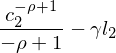

In [3]:
u2 = (c2**(1-rho))/(1-rho)
dis_u2 = gamma*l2
total_u2 = u2 - dis_u2
h2_f = (h1 + l1)
c2_f = w*h2*l2
total_u2

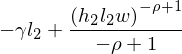

In [4]:
total_u2_sub2 = total_u2.subs(c2,c2_f)
#foc2 = sm.diff(total_u2_sub2,l2)
#foc2
total_u2_sub2

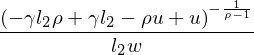

In [5]:
#we should not solve for l2 rigth? this is just a dummy of work or not
#sol2 = sm.solve(sm.Eq(foc2,0),l2)[0]
#sol2
h2_sol = sm.solve(sm.Eq(total_u2_sub2,u),h2)[0]
h2_sol

In [6]:
def utility_work(h2,l2,w,rho,gamma):
    solution = (((h2*l2*w)**(1-rho))/(1-rho))-gamma*l2
    return solution

def utility_notwork(benefits,rho,gamma,l2):
 
    b = ((benefits**(1-rho))/(1-rho))-gamma*l2
    return b
def hum_cap_u(l2,gamma,b,w,rho):
    # i use h2_sol but replace u with the "cutoff"-value, that is the value of unemployment benefits
    nw_u = utility_notwork(b,rho,gamma,0)
    hum_cap = ((-gamma*l2*rho+gamma*l2-rho*nw_u+nw_u)**-(1/(rho-1)))/(l2*w)
    
    return hum_cap

In [7]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
delta = 0.1

In [8]:
#I calculatet the humam capital given b
hum_cap_u(1,gamma,b,w,rho)

In [9]:
def plot_func(h2,w,rho,gamma,b):
    
    work = utility_work(h2,1,w,rho,gamma)
    not_work = utility_notwork(b,rho,gamma,0)
    cutoff = hum_cap_u(1,gamma,b,w,rho)
    
    plt.plot(h2,work,label = "Utility of working")
    plt.plot(h2,not_work,color="red",label="Utility of not working")
    plt.legend()
    
    plt.xlabel("Human capital")
    plt.ylabel("Utility")

    plt.show
    
    print("The worker will supply labour if human capital is above",round(cutoff[0],2), "and no labour if it is below" )
    return 

The worker will supply labour if human capital is above 0.56 and no labour if it is below


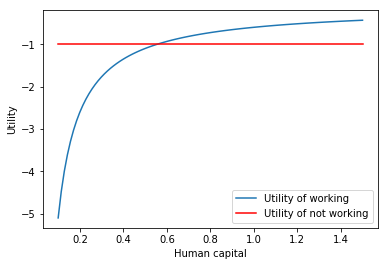

In [10]:
h_vec = np.linspace(0.1,1.5,100) 
b_vec = np.linspace(1,1,100)
plot_func(h_vec,w,rho,gamma,b_vec)

In [11]:
#Another way of showing this is using a binary plot. This requires us to define 
#each level om human capital as either a capital where the worker provies labour
# or a level where she does not - the cutoff is as shown before
cutoff = hum_cap_u(1,gamma,b,w,rho)
print(round(cutoff,2),"human capital")

0.56 human capital


In [12]:
#We define a list
willwork = list(range(100))

#And fill it with either success (1) if the human capital i above the cutoff or
#or falier (0) if it is on the cutoff or below 
for i in range(len(h_vec)): 
    if h_vec[i] > cutoff : 
        willwork[i] = 1
    else : 
        willwork[i] = 0

<function matplotlib.pyplot.show(*args, **kw)>

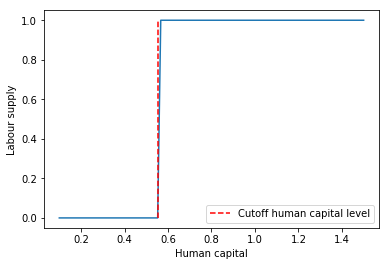

In [13]:
cutoff_vec = np.linspace(cutoff,cutoff,100)
plt.plot(h_vec,willwork)
plt.plot(cutoff_vec,willwork,linestyle="dashed",color="red",label=("Cutoff human capital level"))
plt.legend()
plt.xlabel("Human capital")
plt.ylabel("Labour supply")

plt.show

some text here

In [14]:
#the labour supply as a function of human captal is then:
def labour_supply(hum_cap,w,rho,gamma,b):
    cutoff = hum_cap_u(1,gamma,b,w,rho)
    
    if hum_cap > cutoff :
        print("with a human capital level of",hum_cap,"the worker wil supply 1 labour (l = 1)")
        l = 1
    else :
        print("with a human capital level of",hum_cap,"the worker will supply 0 labour (l=0)")
        l = 0
    return l

In [15]:
human_capital = widgets.FloatSlider(min=0.1,max=1.5,value=0.1,step=0.01)
widgets.interact(labour_supply,hum_cap=human_capital,w=widgets.fixed(w),rho=widgets.fixed(rho),gamma=widgets.fixed(gamma),b=widgets.fixed(b))

interactive(children=(FloatSlider(value=0.1, description='hum_cap', max=1.5, min=0.1, step=0.01), Output()), _…

<function __main__.labour_supply(hum_cap, w, rho, gamma, b)>

## Question 2

In [82]:
rho = sm.symbols('rho')
beta = sm.symbols('beta')
gamma = sm.symbols('gamma')
w = sm.symbols('w')
b = sm.symbols('b')
delta = sm.symbols('Delta')
h1 = sm.symbols('h_1')
h2 = sm.symbols('h_2')
c1 = sm.symbols('c1')
c2 = sm.symbols('c2')
l1 = sm.symbols('l1')
l2 = sm.symbols('l2')
exp = sm.symbols('E[v_2(h_2)]')
u = sm.symbols("u")

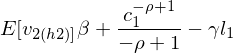

In [84]:
u1 = (c1**(1-rho))/(1-rho)
dis_u1 = gamma*l1
total_u1 = u1 - dis_u1 + beta*exp
total_u1

In [74]:
# I define funcitons for period 2 
def utility_2(h1,w,l1,rho,gamma,beta,delta,b):
    if l1 == 1:
        h2 = h1+1+(0.5*delta)
        c = w*h1*1
        
        u_p2 = utility_work(h2,1,w,rho,gamma)
    
        solution = ((c**(1-rho))/(1-rho))-gamma*1 +beta*u_p2
    else :
        h2 = h1 + 0 + (0.5*delta)
        c = b
        
        u_p2 = utility_work(h2,1,w,rho,gamma)
        
        solution = ((c**(1-rho))/(1-rho))-gamma*0 +beta*u_p2
    return solution




In [85]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
delta = 0.1
h_vec = np.linspace(0.1,1.5,100) 


In [77]:
x = utility_2(h_vec,w,1,rho,gamma,beta,delta,1)
y = utility_2(h_vec,w,0,rho,gamma,beta,delta,1)



In [86]:
willwork_p1 = list(range(100))

#And fill it with either success (1) if the human capital i above the cutoff or
#or falier (0) if it is on the cutoff or below 
for i in range(len(h_vec)): 
    if utility_2(h_vec[i],w,1,rho,gamma,beta,delta,1) > utility_2(h_vec[i],w,0,rho,gamma,beta,delta,1) : 
        willwork_p1[i] = 1
    else : 
        willwork_p1[i] = 0

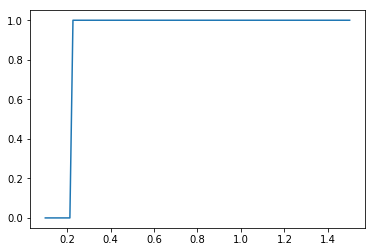

In [87]:
plt.plot(h_vec,willwork)

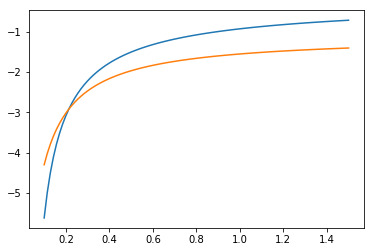

In [88]:
plt.plot(h_vec,x)
plt.plot(h_vec,y)
plt.show()

## Question 3

In [99]:
willeverwork = list(range(100))

#she will work if, and only if the utility next period + the utility this period (which is less than the utility of not working)
# is larger than the utility of not working in period 1 and working in period 2, 
#as well as and not working in period 1 and not working in period 2
for i in range(len(h_vec)): 
    u_w1 = utility_2(h_vec[i],w,1,rho,gamma,beta,delta,b)
    u_nw1 = utility_2(h_vec[i],w,0,rho,gamma,beta,delta,b)
    
    h2 = h_vec[i]+0.5*delta
    u_w1w2 = utility_work(h2,1,w,rho,gamma)
    u_n1w2 = utility_work(h_vec[i],1,w,rho,gamma)
    u_n1n2 = utility_notwork(b,rho,gamma,0)
    
    if u_w1 < u_nw1 :
        if (u_w1 + u_w1w2) > (u_nw1 + u_n1w2):
            if (u_w1 + u_w1w2) > (u_nw1 + u_n1n2):
                print("hello")
    else: 
        print(h_vec[i])

0.22727272727272727
0.24141414141414141
0.25555555555555554
0.26969696969696966
0.28383838383838383
0.297979797979798
0.31212121212121213
0.32626262626262625
0.3404040404040404
0.3545454545454545
0.36868686868686873
0.38282828282828285
0.396969696969697
0.4111111111111111
0.4252525252525252
0.43939393939393934
0.45353535353535357
0.4676767676767677
0.4818181818181818
0.49595959595959593
0.51010101010101
0.5242424242424242
0.5383838383838384
0.5525252525252525
0.5666666666666667
0.5808080808080808
0.5949494949494949
0.609090909090909
0.6232323232323231
0.6373737373737374
0.6515151515151515
0.6656565656565656
0.6797979797979797
0.6939393939393939
0.708080808080808
0.7222222222222222
0.7363636363636363
0.7505050505050505
0.7646464646464646
0.7787878787878787
0.7929292929292928
0.807070707070707
0.8212121212121212
0.8353535353535353
0.8494949494949494
0.8636363636363635
0.8777777777777777
0.8919191919191919
0.906060606060606
0.9202020202020201
0.9343434343434343
0.9484848484848484
0.962626

In [92]:
utility_work((h_vec[0]+0.5*delta),w,1,rho,gamma,beta,delta,b)

TypeError: utility_work() takes 5 positional arguments but 8 were given

In [93]:
h_vec[0]+0.5*delta